In [1]:
#Importar librerias necesarias
# en el archivo readme encontraras como deben estar los datos de produccion y consumo ademas hay una plantilla entre los archivos

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import seaborn as sb

In [3]:
#agregar la direccion de donde se encuentran los datos de produccion y consumo

In [4]:
basepath = "C:/Users/JECH_19/Documents/ciencia datos python"

In [5]:
#poner el nombre del archivo con su extension

In [6]:
archivo1= basepath + "/datos consumo.xlsx"

In [7]:
#leeremos el archivo como un pandas dataframe

In [8]:
dfind = pd.read_excel(archivo1)


In [9]:
#observaremos las columnas que tenemos

In [10]:
dfind.head()

,Año,Mes,Consumo,Producción
0,2004,Enero,7925,274
1,2004,Febrero,12589,452
2,2004,Marzo,8547,400
3,2004,Abril,7695,280
4,2004,Mayo,10255,352


In [11]:
#con la libreria seaborn observaremos los datos con una linea de regresion

<AxesSubplot:xlabel='Producción', ylabel='Consumo'>

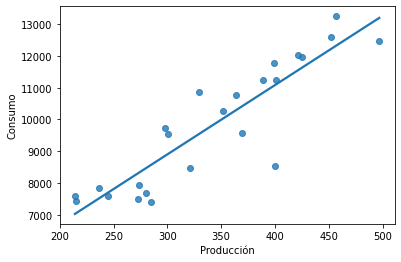

In [12]:
sb.regplot(x='Producción', y='Consumo', ci=None, data=dfind)

In [13]:
#sacaremos las ecuaciones de la linea de regresion, como el intercepto con eje, pendiente, y valor de R cuadrado

In [14]:
x = dfind['Producción']
y = dfind['Consumo']
slope1, intercept1, r_value1, p_value1, std_err1 = linregress(x, y)
r2 = r_value1**2
slope1=round(slope1, 4)
intercept1=round(intercept1)
print("pendiente:",slope1) 
print("interseccion eje:", intercept1)
print("R2:", r2)


pendiente: 21.8192
interseccion eje: 2355
R2: 0.8061072469719288


In [15]:
#se calculan y añaden las siguientes columnas con sus respectivos valores y se saca la desviacion estandar

In [16]:
dfind['Ecalculado']=((dfind['Producción']*slope1)+intercept1)
dfind['E^2']=dfind['Consumo']**2
dfind['Ei*Pi']=dfind['Consumo']*dfind['Producción']

suma_Ei= dfind['Consumo'].sum()
suma_E2=dfind['E^2'].sum()
suma_EixPi=dfind['Ei*Pi'].sum()
print('sumatoria Ei=', suma_Ei)
print('sumatoria E^2=', suma_E2)
print('sumatoria Ei*Pi=', suma_EixPi)

des_Est=((suma_E2-(intercept1*suma_Ei)-(slope1*suma_EixPi))/(dfind.shape[0]-2))**0.5
des_Est=round(des_Est, 5)
print('Des. estan',des_Est)


sumatoria Ei= 235372
sumatoria E^2= 2396893776
sumatoria Ei*Pi= 83661226
Des. estan 883.47696


In [17]:
#se eliminaran los datos mas irregulares respetando que no se pueden eliminar mas del 30% de los datos 

In [18]:
por_dt_eliminar = 40
x=4
while (por_dt_eliminar < 15 or por_dt_eliminar > 30):
    
   dfind['E+(x*Sy,x)']=dfind['Ecalculado']+(des_Est*x)
   dfind['E-(x*Sy,x)']=dfind['Ecalculado']-(des_Est*x)

   dfind['(E+Sy,x)-Ei']=dfind['E+(x*Sy,x)']-dfind['Consumo']
   dfind['Ei-(E-Sy,x)']=dfind['Consumo']-dfind['E-(x*Sy,x)']

   dffiltro = dfind.drop(dfind[dfind['(E+Sy,x)-Ei']<0].index)
   dffiltro = dffiltro.drop(dffiltro[dffiltro['Ei-(E-Sy,x)']<0].index)
   dffiltro.reset_index(drop=True, inplace=True)

   dt_eliminar = dfind.shape[0]-dffiltro.shape[0]
   por_dt_eliminar=(dt_eliminar/dfind.shape[0])*100
   print(por_dt_eliminar,'%')
   print(dt_eliminar)
   print('x',x)
   x = x-0.2
   


0.0 %
0
x 4
0.0 %
0
x 3.8
0.0 %
0
x 3.5999999999999996
0.0 %
0
x 3.3999999999999995
0.0 %
0
x 3.1999999999999993
0.0 %
0
x 2.999999999999999
4.166666666666666 %
1
x 2.799999999999999
4.166666666666666 %
1
x 2.5999999999999988
4.166666666666666 %
1
x 2.3999999999999986
4.166666666666666 %
1
x 2.1999999999999984
4.166666666666666 %
1
x 1.9999999999999984
4.166666666666666 %
1
x 1.7999999999999985
4.166666666666666 %
1
x 1.5999999999999985
8.333333333333332 %
2
x 1.3999999999999986
12.5 %
3
x 1.1999999999999986
20.833333333333336 %
5
x 0.9999999999999987


In [19]:
print(dfind)

     Año         Mes  Consumo  Producción  Ecalculado        E^2    Ei*Pi  \
0   2004      Enero      7925         274   8333.4608   62805625  2171450   
1   2004     Febrero    12589         452  12217.2784  158482921  5690228   
2   2004       Marzo     8547         400  11082.6800   73051209  3418800   
3   2004       Abril     7695         280   8464.3760   59213025  2154600   
4   2004        Mayo    10255         352  10035.3584  105165025  3609760   
5   2004       Junio     7584         245   7700.7040   57517056  1858080   
6   2004       Julio     9541         301   8922.5792   91030681  2871841   
7   2004      Agosto    11254         389  10842.6688  126652516  4377806   
8   2004  Septiembre    13251         457  12326.3744  175589001  6055707   
9   2004     Octubre     7852         236   7504.3312   61653904  1853072   
10  2004   Noviembre     8465         321   9358.9632   71656225  2717265   
11  2004   Diciembre     7412         285   8573.4720   54937744  2112420   

In [20]:
# con seaborn y matplotlib graficaremos la linea base, el limite superior e inferior del consumo.

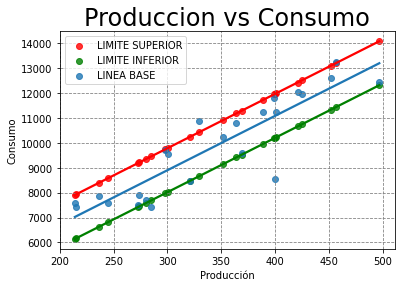

In [21]:
fig, ax = plt.subplots()
sb.regplot(x='Producción', y='E+(x*Sy,x)', data=dfind, ax=ax, color='r',label = "LIMITE SUPERIOR")
sb.regplot(x='Producción', y='E-(x*Sy,x)', data=dfind, ax=ax, color='g',label = "LIMITE INFERIOR")
sb.regplot(x='Producción', y='Consumo',ci=None, data=dfind, ax=ax,label = "LINEA BASE")
ax.grid(axis = 'both', color = 'gray', linestyle = 'dashed')
ax.set_title( "Produccion vs Consumo" , size = 24 )
plt.legend()
plt.show()

In [22]:
#creamos el dataframe con los datos que se eliminaron y borramos las columnas que ya no se utilizaran.

In [23]:
df_lin_met= dffiltro.drop(['Ecalculado', 'E^2', 'Ei*Pi','E+(x*Sy,x)','E-(x*Sy,x)','(E+Sy,x)-Ei','Ei-(E-Sy,x)'], axis=1)
print(df_lin_met)

     Año         Mes  Consumo  Producción
0   2004      Enero      7925         274
1   2004     Febrero    12589         452
2   2004       Abril     7695         280
3   2004        Mayo    10255         352
4   2004       Junio     7584         245
5   2004       Julio     9541         301
6   2004      Agosto    11254         389
7   2004     Octubre     7852         236
8   2005      Enero      9575         369
9   2005     Febrero     7595         214
10  2005       Marzo    11257         401
11  2005       Abril    11789         399
12  2005        Mayo    12458         497
13  2005       Junio     7496         273
14  2005      Agosto     7436         215
15  2005  Septiembre    12036         421
16  2005     Octubre     9731         298
17  2005   Noviembre    10785         364
18  2005   Diciembre    11965         425


In [24]:
#sacaremos las ecuaciones de la linea de regresion, como el intercepto con eje, pendiente, y valor de R cuadrado

In [25]:
x = df_lin_met['Producción']
y = df_lin_met['Consumo']
slope2, intercept2, r_value2, p_value2, std_err2 = linregress(x, y)
r22 = r_value2**2
print("pendiente:",slope2) 
print("interseccion eje:", intercept2)
print("R2:", r22)

pendiente: 21.700010195509087
interseccion eje: 2517.338668303384
R2: 0.9150342958480441


In [26]:
#se agregan las siguientes columnas con sus valores calculados

In [27]:
df_lin_met['Consumo teorico']=(slope2*df_lin_met['Producción']+intercept2)


In [28]:
df_lin_met['Real-Teorico']=df_lin_met['Consumo']-df_lin_met['Consumo teorico']

In [29]:
#se seleccionan los valores superiores a cero y se eliminan

In [30]:
df_lin_met['Diferencia al cuadrado']=df_lin_met['Real-Teorico'].clip(upper=0)


In [31]:
#Se guardan los datos negativos en un dataframe auxiliar y se elevan al cuarado

In [32]:
dfaux=df_lin_met['Diferencia al cuadrado']**2


In [33]:
#se reinicia el index para que comience de 0 y se saca la cantidad de datos que tenemos

In [34]:
dfaux = dfaux.drop(dfaux[dfaux==0].index)
dfaux.reset_index(drop=True, inplace=True)
val_neg=dfaux.shape[0]


In [35]:
#se saca la varianza y la desviacion estandar

In [36]:
varianza=(dfaux.sum())/val_neg

In [37]:
D_estandar=varianza**0.5
print("varianza= ",varianza)
print("Des. Estandar= ",D_estandar)

varianza=  611243.6837468712
Des. Estandar=  781.820749115084


In [38]:
df_lin_met['Linea meta'] = ((slope2*df_lin_met['Producción'])+D_estandar) 


In [39]:
# se graafica la linea base y la linea meta

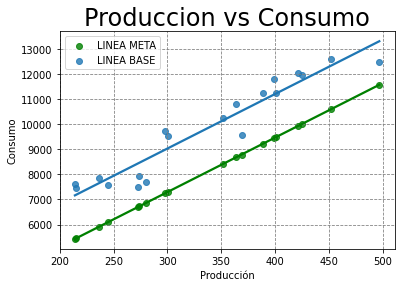

In [40]:
fig, ax = plt.subplots()
sb.regplot(x='Producción', y='Linea meta', data=df_lin_met, ax=ax, color='g',label = "LINEA META")
sb.regplot(x='Producción', y='Consumo',ci=None, data=df_lin_met, ax=ax,label = "LINEA BASE")
ax.grid(axis = 'both', color = 'gray', linestyle = 'dashed')
ax.set_title( "Produccion vs Consumo" , size = 24 )
plt.legend()
plt.show()

In [41]:
# se calcula el ahrro por año y por mes

In [42]:
dlt_E0=intercept2-D_estandar
prc_enrg=1000
Ahrr_mes=dlt_E0*prc_enrg
Ahrr_año=Ahrr_mes*12


In [43]:
# se crea un nuevo data frame correspondiente al indice de consumo, se eliminan las columnas que no se utilizaran y se agregan las nuevas calculadas

In [44]:
df_IC= dffiltro.drop(['Ecalculado', 'E^2', 'Ei*Pi','E+(x*Sy,x)','E-(x*Sy,x)','(E+Sy,x)-Ei','Ei-(E-Sy,x)'], axis=1)

In [45]:
df_IC['IC Real']=df_IC['Consumo']/df_IC['Producción']


In [46]:
df_IC['IC Teorico']=slope2+(intercept2/df_IC['Producción'])


In [47]:
df_IC['2*E0/P^3']= (2*intercept2)/(df_IC['Producción'])**3


In [48]:
# se grafica la prodccion vs la segunda derivada

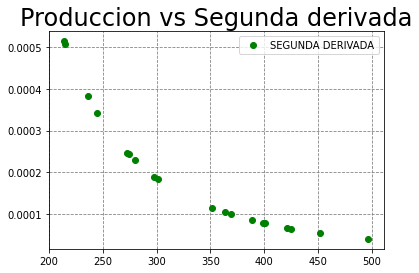

In [49]:
fig, ax = plt.subplots()
x=df_IC['Producción']
y=df_IC['2*E0/P^3']
plt.plot(x, y,'o' ,color='g',label = "SEGUNDA DERIVADA")
ax.grid(axis = 'both', color = 'gray', linestyle = 'dashed')
ax.set_title( "Produccion vs Segunda derivada" , size = 24 )
plt.legend()
plt.show()

In [50]:
#se sacan los valore maximo de X y de Y, tambien el minimo de X

In [51]:
maxx=round(df_IC['Producción'].max())
minx=round(df_IC['Producción'].min())
maxy=round(df_IC['IC Real'].max())
maxx
minx
maxy

35

In [52]:
#se grafica la segunda derivada con una linea de tendencia polinomica

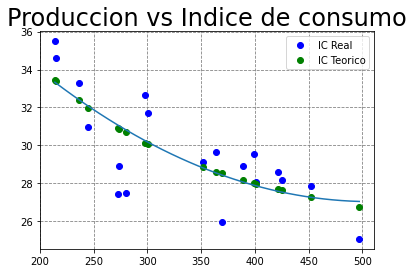

In [53]:
fig, ax = plt.subplots()
x=df_IC['Producción']
y=df_IC['IC Real']
y1=df_IC['IC Teorico']
modelo = np.poly1d (np.polyfit (x, y, 2))
plt.plot(x, y,'o' ,color='b',label = "IC Real")
plt.plot(x, y1,'o' ,color='g',label = "IC Teorico")
polilinea=np.linspace(minx,maxx,maxy)
ax.grid(axis = 'both', color = 'gray', linestyle = 'dashed')
ax.set_title( "Produccion vs Indice de consumo" , size = 24 )
plt.plot(polilinea,modelo(polilinea))
plt.legend()
plt.show()

In [54]:
mean_consumo= df_IC['Consumo'].mean()
mean_produccion=df_IC['Producción'].mean()

min_IC_Teorico=df_IC['IC Teorico'].min()
df_val_min=df_IC[df_IC['IC Teorico']==min_IC_Teorico]

min_IC_Real=df_val_min['IC Real'].values[0]
val_prod_segun_IC_min=df_val_min['Producción'].values[0]
pot_ahorro=abs(mean_produccion*(min_IC_Real-min_IC_Teorico))
porcen_ahorr=(pot_ahorro/mean_consumo)*100
Ah_econo=pot_ahorro*1000
TPH=30*24


rata_critica=val_prod_segun_IC_min/TPH
rata_produccion=mean_produccion/TPH
print('promedio de consumo:',mean_consumo)
print('promedio de produccion:',mean_produccion)
print('valor minimo de IC Real:',min_IC_Real)
print('valor minimo de IC Teorico:',min_IC_Teorico)
print('potencial de ahorro:',pot_ahorro)
print('porcentaje de ahorro:',porcen_ahorr)
print('ahorro economico:',Ah_econo)
print('TPH:',TPH)
print('valor de produccion segun IC minimo:',val_prod_segun_IC_min)
print('rata critica:',rata_critica)
print('rata de produccion:',rata_produccion)

promedio de consumo: 9832.526315789473
promedio de produccion: 337.10526315789474
valor minimo de IC Real: 25.06639839034205
valor minimo de IC Teorico: 26.765077938574247
potencial de ahorro: 572.6338161277481
porcentaje de ahorro: 5.8238727030731585
ahorro economico: 572633.8161277481
TPH: 720
valor de produccion segun IC minimo: 497
rata critica: 0.6902777777777778
rata de produccion: 0.4682017543859649


In [55]:
# se crea un dataframe que contine los datos originales y se crea un dataframe para el presupuesto con los datos originales

In [56]:
dforg= dfind.drop(['Ecalculado', 'E^2', 'Ei*Pi','E+(x*Sy,x)','E-(x*Sy,x)','(E+Sy,x)-Ei','Ei-(E-Sy,x)'], axis=1)
dfpresupuesto=dforg
n=len(dfpresupuesto['Producción'])
a = 0
b = 1

In [57]:
#sacaremos las ecuaciones de la linea de regresion, como el intercepto con eje, pendiente, y valor de R cuadrado

In [58]:
x3 = dforg['Producción']
y3= dforg['Consumo']
slope3, intercept3, r_value3, p_value3, std_err3 = linregress(x3, y3)
r23 = r_value3**2
print("pendiente:",slope3) 
print("interseccion eje:", intercept3)
print("R2:", r23)

pendiente: 21.819236182217036
interseccion eje: 2354.988375598622
R2: 0.8061072469719288


In [59]:
#se introducen la produccion que se planea para los siguientes meses

In [60]:

while a == 0:
    print('Introduzca la poduccion planeada del siguiente mes ', end='')
    p=input()
    p=int(p)
    dfpresupuesto.at[n,'produccion planeada']=p
    print('presione 0 para agregar otro mes y 1 para finalizar', end='')
    a = input() 
    a = int (a)
    n = n+1
    b = b+1
print ('xxx')

Introduzca la poduccion planeada del siguiente mes 

 1


presione 0 para agregar otro mes y 1 para finalizar

 0


Introduzca la poduccion planeada del siguiente mes 

 1


presione 0 para agregar otro mes y 1 para finalizar

 0


Introduzca la poduccion planeada del siguiente mes 

 1


presione 0 para agregar otro mes y 1 para finalizar

 1


xxx


In [61]:
n1 = (n-b) + 1
while n1 != n:
    dfpresupuesto.at[n1,'consumo teorico']=(slope3*dfpresupuesto.at[n1,'produccion planeada'])+intercept3
    n1 = n1+1
    n1 = int(n1)
print ('xxx')

xxx


In [62]:
#se introduce el consumu real que tubo la empresa

In [63]:
n1 = (n-b) + 1

while n1 != n:
    print('Introduzca consumo real del mes ', end='')
    c=input()
    c=int(c)
    dfpresupuesto.at[n1,'consumo real']=c
    n1 = n1+1
    n1 = int(n1)
print ('xxx')

Introduzca consumo real del mes 

 1


Introduzca consumo real del mes 

 1


Introduzca consumo real del mes 

 1


xxx


In [64]:
#se introduce la produccion real del mes

In [ ]:
n1 = (n-b) + 1
while n1 != n:
    print('Introduzca produccion real del mes ', end='')
    p=input()
    p = int(p)
    dfpresupuesto.at[n1,'produccion real']=p
    n1 = n1+1
    n1 = int(n1)
print ('xxx')

Introduzca produccion real del mes 

 1


Introduzca produccion real del mes 

 1


Introduzca produccion real del mes 

 1


xxx


In [ ]:
#se añaden las siguientes columnas y se calculan los datos

In [ ]:
dfpresupuesto['Var_pres_pro']=slope3*(dfpresupuesto['produccion real']-dfpresupuesto['produccion planeada'])

In [ ]:
dfpresupuesto['E linea base']=(slope3*dfpresupuesto['produccion real'])+intercept3

In [ ]:
dfpresupuesto['Var_pres_efi']=dfpresupuesto['consumo real']-dfpresupuesto['E linea base']

In [ ]:
dfpresupuesto['Var_total']=dfpresupuesto['Var_pres_efi']+dfpresupuesto['Var_pres_pro']

In [ ]:
print(dfpresupuesto)

       Año         Mes  Consumo  Producción  produccion planeada  \
0   2004.0      Enero    7925.0       274.0                  NaN   
1   2004.0     Febrero  12589.0       452.0                  NaN   
2   2004.0       Marzo   8547.0       400.0                  NaN   
3   2004.0       Abril   7695.0       280.0                  NaN   
4   2004.0        Mayo  10255.0       352.0                  NaN   
5   2004.0       Junio   7584.0       245.0                  NaN   
6   2004.0       Julio   9541.0       301.0                  NaN   
7   2004.0      Agosto  11254.0       389.0                  NaN   
8   2004.0  Septiembre  13251.0       457.0                  NaN   
9   2004.0     Octubre   7852.0       236.0                  NaN   
10  2004.0   Noviembre   8465.0       321.0                  NaN   
11  2004.0   Diciembre   7412.0       285.0                  NaN   
12  2005.0      Enero    9575.0       369.0                  NaN   
13  2005.0     Febrero   7595.0       214.0     

In [ ]:
# se concluye si se fue eficiente en produccion o en consumo

In [ ]:
n1 = (n-b) + 1

while n1 != n:
    if dfpresupuesto.at[n1,'Var_pres_pro']>0 and dfpresupuesto.at[n1,'Var_pres_efi']<0:
        dfpresupuesto.at[n1,'Observacion']='Fui eficiente en produccion y eficiente en consumo'
    if dfpresupuesto.at[n1,'Var_pres_pro']<0 and dfpresupuesto.at[n1,'Var_pres_efi']<0:   
        dfpresupuesto.at[n1,'Observacion']='Fui ineficiente en produccion y eficiente en consumo'
    if dfpresupuesto.at[n1,'Var_pres_pro']>0 and dfpresupuesto.at[n1,'Var_pres_efi']>0:   
        dfpresupuesto.at[n1,'Observacion']='Fui eficiente en produccion e ineficiente en consumo'
    if dfpresupuesto.at[n1,'Var_pres_pro']<0 and dfpresupuesto.at[n1,'Var_pres_efi']>0:   
        dfpresupuesto.at[n1,'Observacion']='Fui ineficiente en produccion e ineficiente en consumo'
    if dfpresupuesto.at[n1,'Var_pres_pro']==0 and dfpresupuesto.at[n1,'Var_pres_efi']>0:   
        dfpresupuesto.at[n1,'Observacion']='produccion solicitada e ineficiente en consumo'
    if dfpresupuesto.at[n1,'Var_pres_pro']==0 and dfpresupuesto.at[n1,'Var_pres_efi']<0:   
        dfpresupuesto.at[n1,'Observacion']='produccion solicitada y eficiente en consumo'
    if dfpresupuesto.at[n1,'Var_pres_pro']>0 and dfpresupuesto.at[n1,'Var_pres_efi']==0:   
        dfpresupuesto.at[n1,'Observacion']='eficiente en produccion y eficiente en consumo'
    if dfpresupuesto.at[n1,'Var_pres_pro']<0 and dfpresupuesto.at[n1,'Var_pres_efi']==0:   
        dfpresupuesto.at[n1,'Observacion']='ineficiente en produccion y eficiente en consumo'
    if dfpresupuesto.at[n1,'Var_pres_pro']>0 and dfpresupuesto.at[n1,'Var_pres_efi']==0:   
        dfpresupuesto.at[n1,'Observacion']='produccion solicitada y eficiente en consumo'
    n1 = n1+1
print ('xxx')

xxx


In [ ]:
print(dfpresupuesto)

       Año         Mes  Consumo  Producción  produccion planeada  \
0   2004.0      Enero    7925.0       274.0                  NaN   
1   2004.0     Febrero  12589.0       452.0                  NaN   
2   2004.0       Marzo   8547.0       400.0                  NaN   
3   2004.0       Abril   7695.0       280.0                  NaN   
4   2004.0        Mayo  10255.0       352.0                  NaN   
5   2004.0       Junio   7584.0       245.0                  NaN   
6   2004.0       Julio   9541.0       301.0                  NaN   
7   2004.0      Agosto  11254.0       389.0                  NaN   
8   2004.0  Septiembre  13251.0       457.0                  NaN   
9   2004.0     Octubre   7852.0       236.0                  NaN   
10  2004.0   Noviembre   8465.0       321.0                  NaN   
11  2004.0   Diciembre   7412.0       285.0                  NaN   
12  2005.0      Enero    9575.0       369.0                  NaN   
13  2005.0     Febrero   7595.0       214.0     

In [ ]:
#se guardan nuevamente los datos originales

In [ ]:
dforg= dfind.drop(['Ecalculado', 'E^2', 'Ei*Pi','E+(x*Sy,x)','E-(x*Sy,x)','(E+Sy,x)-Ei','Ei-(E-Sy,x)'], axis=1)

In [ ]:
#se crea un nuevo dataframe para el indicador de eficiencia

In [ ]:
df_indefic_año2=dforg


In [ ]:
# se seleecionan solo los datos del año 2

In [ ]:
indexNames=df_indefic_año2[df_indefic_año2['Año']==2004].index

In [ ]:
df_indefic_año2.drop(indexNames, inplace=True)

In [ ]:
df_indefic_año2.reset_index(drop=True, inplace=True)

In [ ]:
print(df_indefic_año2)

     Año         Mes  Consumo  Producción
0   2005      Enero      9575         369
1   2005     Febrero     7595         214
2   2005       Marzo    11257         401
3   2005       Abril    11789         399
4   2005        Mayo    12458         497
5   2005       Junio     7496         273
6   2005       Julio    10879         329
7   2005      Agosto     7436         215
8   2005  Septiembre    12036         421
9   2005     Octubre     9731         298
10  2005   Noviembre    10785         364
11  2005   Diciembre    11965         425


In [ ]:
dforg= dfind.drop(['Ecalculado', 'E^2', 'Ei*Pi','E+(x*Sy,x)','E-(x*Sy,x)','(E+Sy,x)-Ei','Ei-(E-Sy,x)'], axis=1)

In [ ]:
# se seleccionan solo los datos de año 1

In [ ]:
df_indefic_año1=dforg

In [ ]:

indexNames=df_indefic_año1[df_indefic_año1['Año']==2005].index

In [ ]:
df_indefic_año1.drop(indexNames, inplace=True)


In [ ]:
print(df_indefic_año1)

     Año         Mes  Consumo  Producción
0   2004      Enero      7925         274
1   2004     Febrero    12589         452
2   2004       Marzo     8547         400
3   2004       Abril     7695         280
4   2004        Mayo    10255         352
5   2004       Junio     7584         245
6   2004       Julio     9541         301
7   2004      Agosto    11254         389
8   2004  Septiembre    13251         457
9   2004     Octubre     7852         236
10  2004   Noviembre     8465         321
11  2004   Diciembre     7412         285


In [ ]:
#sacaremos las ecuaciones de la linea de regresion, como el intercepto con eje, pendiente, y valor de R cuadrado del año 1

In [ ]:
x4 = df_indefic_año1['Producción']
y4= df_indefic_año1['Consumo']
slope4, intercept4, r_value4, p_value4, std_err4 = linregress(x4, y4)
r24 = r_value4**2
print("pendiente:",slope4) 
print("interseccion eje:", intercept4)
print("R2:", r24)

pendiente: 23.422621695721897
interseccion eje: 1572.241182556514
R2: 0.776889131352878


In [ ]:

df_indefic_año1['Ecalculado']=((df_indefic_año1['Producción']*slope4)+intercept4)

df_indefic_año1['E^2']=df_indefic_año1['Consumo']**2

df_indefic_año1['Ei*Pi']=df_indefic_año1['Consumo']*df_indefic_año1['Producción']


suma_Ei= df_indefic_año1['Consumo'].sum()
suma_E2=df_indefic_año1['E^2'].sum()
suma_EixPi=df_indefic_año1['Ei*Pi'].sum()
print('sumatoria Ei=', suma_Ei)
print('sumatoria E^2=', suma_E2)
print('sumatoria Ei*Pi=', suma_EixPi)

des_Est=((suma_E2-(intercept4*suma_Ei)-(slope4*suma_EixPi))/(df_indefic_año1.shape[0]-2))**0.5
print(des_Est)

sumatoria Ei= 112370
sumatoria E^2= 1097754932
sumatoria Ei*Pi= 38891029
1007.5877476316872


In [ ]:
dfaux1=df_indefic_año1.drop(['Ecalculado', 'E^2', 'Ei*Pi'], axis=1)

In [ ]:
df_indefic_año1

,Año,Mes,Consumo,Producción,Ecalculado,E^2,Ei*Pi
0,2004,Enero,7925,274,7990.039527,62805625,2171450
1,2004,Febrero,12589,452,12159.266189,158482921,5690228
2,2004,Marzo,8547,400,10941.289861,73051209,3418800
3,2004,Abril,7695,280,8130.575257,59213025,2154600
4,2004,Mayo,10255,352,9817.004019,105165025,3609760
5,2004,Junio,7584,245,7310.783498,57517056,1858080
6,2004,Julio,9541,301,8622.450313,91030681,2871841
7,2004,Agosto,11254,389,10683.641022,126652516,4377806
8,2004,Septiembre,13251,457,12276.379298,175589001,6055707
9,2004,Octubre,7852,236,7099.979903,61653904,1853072


In [ ]:
por_dt_eliminar1 = 40
x=4
while (por_dt_eliminar1 < 1 or por_dt_eliminar1 > 30):
    
   df_indefic_año1['E+(x*Sy,x)']=df_indefic_año1['Ecalculado']+(des_Est*x)
   df_indefic_año1['E-(x*Sy,x)']=df_indefic_año1['Ecalculado']-(des_Est*x)

   df_indefic_año1['(E+Sy,x)-Ei']=df_indefic_año1['E+(x*Sy,x)']-df_indefic_año1['Consumo']
   df_indefic_año1['Ei-(E-Sy,x)']=df_indefic_año1['Consumo']-df_indefic_año1['E-(x*Sy,x)']

   dffiltro1 = df_indefic_año1.drop(df_indefic_año1[df_indefic_año1['(E+Sy,x)-Ei']<0].index)
   dffiltro1 = dffiltro1.drop(dffiltro1[dffiltro1['Ei-(E-Sy,x)']<0].index)
   dffiltro1.reset_index(drop=True, inplace=True)

   dt_eliminar1 = df_indefic_año1.shape[0]-dffiltro1.shape[0]
   por_dt_eliminar1=(dt_eliminar1/df_indefic_año1.shape[0])*100
   print(por_dt_eliminar1,'%')
   print(dt_eliminar1)
   print(x)
   x = x-0.2
   


0.0 %
0
4
0.0 %
0
3.8
0.0 %
0
3.5999999999999996
0.0 %
0
3.3999999999999995
0.0 %
0
3.1999999999999993
0.0 %
0
2.999999999999999
0.0 %
0
2.799999999999999
0.0 %
0
2.5999999999999988
0.0 %
0
2.3999999999999986
8.333333333333332 %
1
2.1999999999999984


In [ ]:
print(df_indefic_año1)

     Año         Mes  Consumo  Producción    Ecalculado        E^2    Ei*Pi  \
0   2004      Enero      7925         274   7990.039527   62805625  2171450   
1   2004     Febrero    12589         452  12159.266189  158482921  5690228   
2   2004       Marzo     8547         400  10941.289861   73051209  3418800   
3   2004       Abril     7695         280   8130.575257   59213025  2154600   
4   2004        Mayo    10255         352   9817.004019  105165025  3609760   
5   2004       Junio     7584         245   7310.783498   57517056  1858080   
6   2004       Julio     9541         301   8622.450313   91030681  2871841   
7   2004      Agosto    11254         389  10683.641022  126652516  4377806   
8   2004  Septiembre    13251         457  12276.379298  175589001  6055707   
9   2004     Octubre     7852         236   7099.979903   61653904  1853072   
10  2004   Noviembre     8465         321   9090.902747   71656225  2717265   
11  2004   Diciembre     7412         285   8247.688

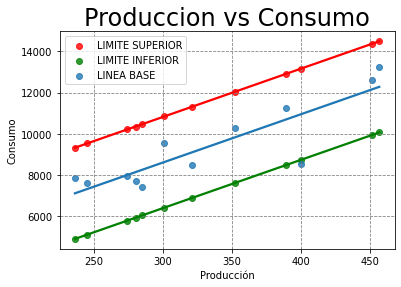

In [ ]:
fig, ax = plt.subplots()
sb.regplot(x='Producción', y='E+(x*Sy,x)', data=df_indefic_año1, ax=ax, color='r',label = "LIMITE SUPERIOR")
sb.regplot(x='Producción', y='E-(x*Sy,x)', data=df_indefic_año1, ax=ax, color='g',label = "LIMITE INFERIOR")
sb.regplot(x='Producción', y='Consumo',ci=None, data=df_indefic_año1, ax=ax,label = "LINEA BASE")
ax.grid(axis = 'both', color = 'gray', linestyle = 'dashed')
ax.set_title( "Produccion vs Consumo" , size = 24 )
plt.legend()
plt.show()

In [ ]:
dffiltro1=dffiltro1.drop(['Ecalculado','E^2','Ei*Pi','E+(x*Sy,x)','E-(x*Sy,x)','(E+Sy,x)-Ei','Ei-(E-Sy,x)'],axis=1)

In [ ]:
x = dffiltro1['Producción']
y = dffiltro1['Consumo']
slope5, intercept5, r_value5, p_value5, std_err5 = linregress(x, y)
r25 = r_value5**2
print("pendiente:",slope5) 
print("interseccion eje:", intercept5)
print("R2:", r25)

pendiente: 26.378905497877447
interseccion eje: 824.5428592385651
R2: 0.9245420691304512


In [ ]:
dffiltro1['Consumo teorico']=(slope5*dffiltro1['Producción']+intercept5)


In [ ]:
dffiltro1['Real-Teorico']=dffiltro1['Consumo']-dffiltro1['Consumo teorico']

In [ ]:
dffiltro1['Diferencia al cuadrado']=(dffiltro1['Real-Teorico'].clip(upper=0))**2


In [ ]:
print(dffiltro1)

     Año         Mes  Consumo  Producción  Consumo teorico  Real-Teorico  \
0   2004      Enero      7925         274      8052.362966   -127.362966   
1   2004     Febrero    12589         452     12747.808144   -158.808144   
2   2004       Abril     7695         280      8210.636399   -515.636399   
3   2004        Mayo    10255         352     10109.917594    145.082406   
4   2004       Junio     7584         245      7287.374706    296.625294   
5   2004       Julio     9541         301      8764.593414    776.406586   
6   2004      Agosto    11254         389     11085.937098    168.062902   
7   2004  Septiembre    13251         457     12879.702672    371.297328   
8   2004     Octubre     7852         236      7049.964557    802.035443   
9   2004   Noviembre     8465         321      9292.171524   -827.171524   
10  2004   Diciembre     7412         285      8342.530926   -930.530926   

    Diferencia al cuadrado  
0             16221.325021  
1             25220.026689  


In [ ]:
dfaux1=dffiltro1['Diferencia al cuadrado']
dfaux1

0      16221.325021
1      25220.026689
2     265880.895607
3          0.000000
4          0.000000
5          0.000000
6          0.000000
7          0.000000
8          0.000000
9     684212.730211
10    865887.804491
Name: Diferencia al cuadrado, dtype: float64

In [ ]:
dfaux1 = dfaux1.drop(dfaux1[dfaux1==0].index)
dfaux1.reset_index(drop=True, inplace=True)
val_neg1=dfaux1.shape[0]
val_neg1

5

In [ ]:
varianza1=(dfaux1.sum()/val_neg1)

In [ ]:
D_estandar1=varianza1**0.5
print("varianza= ",varianza1)
print("Des. Estandar= ",D_estandar1)


varianza=  371484.5564038856
Des. Estandar=  609.4953292715913


In [ ]:
dffiltro1['Linea meta'] = ((slope5*dffiltro1['Producción'])+D_estandar1) 


In [ ]:
print(dffiltro1)

     Año         Mes  Consumo  Producción  Consumo teorico  Real-Teorico  \
0   2004      Enero      7925         274      8052.362966   -127.362966   
1   2004     Febrero    12589         452     12747.808144   -158.808144   
2   2004       Abril     7695         280      8210.636399   -515.636399   
3   2004        Mayo    10255         352     10109.917594    145.082406   
4   2004       Junio     7584         245      7287.374706    296.625294   
5   2004       Julio     9541         301      8764.593414    776.406586   
6   2004      Agosto    11254         389     11085.937098    168.062902   
7   2004  Septiembre    13251         457     12879.702672    371.297328   
8   2004     Octubre     7852         236      7049.964557    802.035443   
9   2004   Noviembre     8465         321      9292.171524   -827.171524   
10  2004   Diciembre     7412         285      8342.530926   -930.530926   

    Diferencia al cuadrado    Linea meta  
0             16221.325021   7837.315436  
1

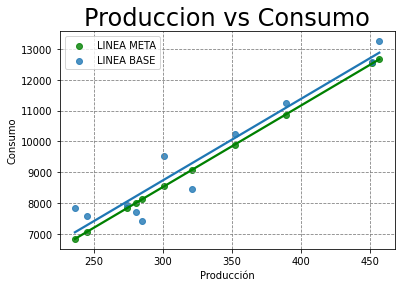

In [ ]:
fig, ax = plt.subplots()
sb.regplot(x='Producción', y='Linea meta', data=dffiltro1, ax=ax, color='g',label = "LINEA META")
sb.regplot(x='Producción', y='Consumo',ci=None, data=dffiltro1, ax=ax,label = "LINEA BASE")
ax.grid(axis = 'both', color = 'gray', linestyle = 'dashed')
ax.set_title( "Produccion vs Consumo" , size = 24 )
plt.legend()
plt.show()

In [ ]:
# se calculan los datos del año 2 para el indicador de eficiencia en base 100

In [ ]:
df_indefic_año2['EL=mlb*Preal+E0LB']=(slope5*df_indefic_año2['Producción'])+intercept5

In [ ]:
df_indefic_año2['Em=mlm*Preal+E0Lm']=(slope5*df_indefic_año2['Producción'])+D_estandar1

In [ ]:
df_indefic_año2['lb100=(Elb/Ereal)*100']=(df_indefic_año2['EL=mlb*Preal+E0LB']/df_indefic_año2['Consumo'])*100

In [ ]:
df_indefic_año2['lb100=(Elm/Ereal)*100']=(df_indefic_año2['Em=mlm*Preal+E0Lm']/df_indefic_año2['Consumo'])*100

In [ ]:
df_indefic_año2.reset_index(drop=True, inplace=True)
tam=(df_indefic_año2.shape[0])
tam
naux=0

In [ ]:
tam

12

In [ ]:

while (naux<tam):
    df_indefic_año2.at[naux,'a']=naux
    df_indefic_año2['b']=100
    df_indefic_año2['c']=120
    df_indefic_año2['d']=80
    naux=naux+1
   
    

In [ ]:
print(df_indefic_año2)

     Año         Mes  Consumo  Producción  EL=mlb*Preal+E0LB  \
0   2005      Enero      9575         369       10558.358988   
1   2005     Febrero     7595         214        6469.628636   
2   2005       Marzo    11257         401       11402.483964   
3   2005       Abril    11789         399       11349.726153   
4   2005        Mayo    12458         497       13934.858892   
5   2005       Junio     7496         273        8025.984060   
6   2005       Julio    10879         329        9503.202768   
7   2005      Agosto     7436         215        6496.007541   
8   2005  Septiembre    12036         421       11930.062074   
9   2005     Octubre     9731         298        8685.456698   
10  2005   Noviembre    10785         364       10426.464460   
11  2005   Diciembre    11965         425       12035.577696   

    Em=mlm*Preal+E0Lm  lb100=(Elb/Ereal)*100  lb100=(Elm/Ereal)*100     a  \
0        10343.311458             110.270068             108.024141   0.0   
1         625

In [ ]:
# se grafica el indicador de eficiencia en base 100

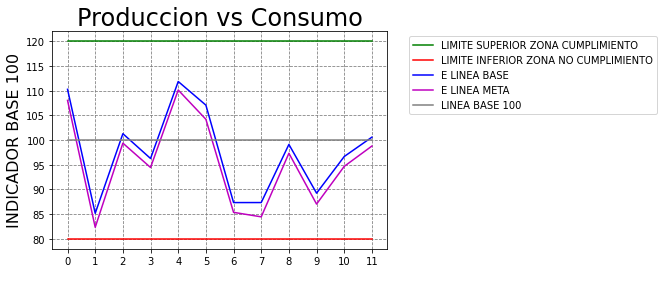

In [ ]:
fig, ax = plt.subplots()
sb.lineplot(x='a', y='c',ci=None, data=df_indefic_año2, ax=ax, color='g',label = "LIMITE SUPERIOR ZONA CUMPLIMIENTO")
sb.lineplot(x='a', y='d',ci=None, data=df_indefic_año2, ax=ax, color='r',label = "LIMITE INFERIOR ZONA NO CUMPLIMIENTO")
sb.lineplot(x='a', y='lb100=(Elb/Ereal)*100',ci=None, data=df_indefic_año2, ax=ax, color='b',label = "E LINEA BASE")
sb.lineplot(x='a', y='lb100=(Elm/Ereal)*100',ci=None, data=df_indefic_año2, ax=ax, color='m',label = "E LINEA META")
sb.lineplot(x='a', y='b',ci=None, data=df_indefic_año2, ax=ax, color='gray' ,label = "LINEA BASE 100")
ax.grid(axis = 'both', color = 'gray', linestyle = 'dashed')
ax.set_title( "Produccion vs Consumo" , size = 24 )
plt.xticks(range(0,naux,1))
plt.xlabel("X Label",color='w')
plt.ylabel("INDICADOR BASE 100", size = 16)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()